# Imports

In [60]:
from requests import get
from bs4 import BeautifulSoup
import os
from time import sleep
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
import unicodedata
import json
from wordcloud import WordCloud
import numpy as np
import pprint as pprint
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

## Data Acquisition

### Acquiring a list of movies.
100 Most Popular Movies on IMDb.

In [2]:
url = '''https://www.imdb.com/chart/moviemeter?ref_=nv_mv_mpm'''
response = get(url)

In [3]:
print(response.text[:400])




<!DOCTYPE html>
<html
    xmlns:og="http://ogp.me/ns#"
    xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
         
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">

    
    
    

    
    
    

    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">
            <style>
                body#styleguide


In [4]:
soup = BeautifulSoup(response.content, 
#                     'lxml')
                    'html.parser')

In [5]:
# see also `soup.find_all`

messy_movies = soup.find_all('td', class_='titleColumn')

In [6]:
len(messy_movies)

100

In [7]:
movies = []
trigger1 = []
for movie in messy_movies:
    movie_title = movie.find('a').text.lower().replace(' ', '%20')
    movies.append(re.sub(r"[^a-z0-9%\s]", '', movie_title))
    trigger1.append(False)
movies

['spiderman%20far%20from%20home',
 'midsommar',
 'toy%20story%204',
 'yesterday',
 'once%20upon%20a%20time%20%20in%20hollywood',
 'spiderman%20into%20the%20spiderverse',
 'avengers%20endgame',
 'knives%20out',
 'the%20lion%20king',
 'annabelle%20comes%20home',
 'shaft',
 'alita%20battle%20angel',
 'charlies%20angels',
 'shazam',
 'jumanji%20the%20next%20level',
 'murder%20mystery',
 'after',
 'aladdin',
 'hellboy',
 'rocketman',
 'spiderman%20homecoming',
 'childs%20play',
 'anna',
 'men%20in%20black%20international',
 'captain%20marvel',
 'midway',
 'john%20wick%20chapter%203%20%20parabellum',
 'us',
 'fast%20%20furious%20presents%20hobbs%20%20shaw',
 'crawl',
 'hereditary',
 'i%20am%20mother',
 'escape%20plan%20the%20extractors',
 'star%20wars%20the%20rise%20of%20skywalker',
 'robin%20hood',
 'pet%20sematary',
 'dark%20phoenix',
 'kabir%20singh',
 'the%20little%20mermaid',
 'dumbo',
 'the%20spy%20who%20dumped%20me',
 'godzilla%20king%20of%20the%20monsters',
 'it%20chapter%20two',
 's

### Acquiring a list of movies with triggers.

In [8]:
url = '''https://istheresuicideinit.tumblr.com/post/116009541869/films'''
response = get(url)

In [9]:
soup = BeautifulSoup(response.content, 
#                     'lxml')
                    'html.parser')

In [10]:
# see also `soup.find_all`

trigger_movies = soup.find('ul')
trigger_movies.find_all('li')

[<li>2:37 (2006)</li>,
 <li>3 idiots (2009)</li>,
 <li>28 days later (2002)</li>,
 <li>47 ronin (2013)</li>,
 <li>1408 (2007)</li>,
 <li>a clockwork orange (1971)</li>,
 <li>airplane! (1980)</li>,
 <li>almost famous (2000)</li>,
 <li>a long way down (2014)</li>,
 <li>always watching: a marble hornets story (2015)</li>,
 <li>a mother’s nightmare (2012)</li>,
 <li>an american werewolf in london (1981)</li>,
 <li>annabelle (2014)</li>,
 <li>anchorman 2: the legend continues (2013)</li>,
 <li>archie’s final project (2011)</li>,
 <li>arizona dream (1992) </li>,
 <li>as above, so below (2014)</li>,
 <li>a single man (2009)</li>,
 <li>a streetcar named desire (1951, 1984, 1987)</li>,
 <li>battle royale (2000)</li>,
 <li>before I disappear (2014)</li>,
 <li>ben x (2007)</li>,
 <li>better off dead (1985)</li>,
 <li>birdman: or (the unexpected virtue of ignorance) (2014)</li>,
 <li>blackbird (2014)</li>,
 <li>black swan (2010)</li>,
 <li>boogie nights (1997)</li>,
 <li>boogeyman 2 (2007)</li>,
 

In [11]:
trigger_movies_list = []
trigger2 = []
for trigger_movie in trigger_movies:
    movie_title = trigger_movie.text.replace(' ', '%20')
    movie_title = re.sub(r"[^\w%]", '', movie_title)
    trigger_movies_list.append(re.sub(r"[\d%]+$", '', movie_title))
    trigger2.append(True)
trigger_movies_list

['',
 '3%20idiots',
 '28%20days%20later',
 '47%20ronin',
 '',
 'a%20clockwork%20orange',
 'airplane',
 'almost%20famous',
 'a%20long%20way%20down',
 'always%20watching%20a%20marble%20hornets%20story',
 'a%20mothers%20nightmare',
 'an%20american%20werewolf%20in%20london',
 'annabelle',
 'anchorman%202%20the%20legend%20continues',
 'archies%20final%20project',
 'arizona%20dream',
 'as%20above%20so%20below',
 'a%20single%20man',
 'a%20streetcar%20named%20desire',
 'battle%20royale',
 'before%20I%20disappear',
 'ben%20x',
 'better%20off%20dead',
 'birdman%20or%20the%20unexpected%20virtue%20of%20ignorance',
 'blackbird',
 'black%20swan',
 'boogie%20nights',
 'boogeyman',
 'casino%20royale',
 'carrie',
 'charlie%20bartlett',
 'chatroom',
 'cloud%20atlas',
 'constantine',
 'cozy%20dens%20czech%20Pelíšky',
 'cyberbully',
 'cyberbully',
 'dead%20poets%20society',
 'dear%20lemon%20lima',
 'detachment',
 'die%20welle%20german',
 'disconnect',
 'divergent',
 'donnie%20darko',
 'edge%20of%20tomorro

In [12]:
len(trigger_movies_list)

159

In [13]:
trigger1.extend(trigger2)
len(trigger1)

259

In [14]:
movies.extend(trigger_movies_list)

### Scraping tweets from Twitter.

In [15]:
browser = webdriver.Chrome()
# print('Connecting to Twitter')


tweets = []
tweets_movie_title = []
tweets_trigger = []


for movie, trigger in list(zip(movies, trigger1)):
    # print(f'Looking up {movie}')
    browser.get(f"https://twitter.com/search?q={movie}%20trigger&src=typd")
    # time.sleep(1)

    elem = browser.find_element_by_tag_name("body")

    no_of_pagedowns = 18
    # print('Scrolling thru page.')

    while no_of_pagedowns:
        elem.send_keys(Keys.PAGE_DOWN)
        # time.sleep(0.2)
        no_of_pagedowns-=1

    post_elems = browser.find_elements_by_class_name("js-tweet-text-container")
    # print('Grabbing Tweets.')

    for post in post_elems:
        tweets.append(post.text)
        tweets_movie_title.append(movie)
        tweets_trigger.append(trigger)
    # print('Completed.')

In [16]:
df = pd.DataFrame({'title':tweets_movie_title, 'tweet':tweets, 'trigger_scene':tweets_trigger})
df.head()

,title,tweet,trigger_scene
0,spiderman%20far%20from%20home,so i just finished watching spiderman far from...,False
1,spiderman%20far%20from%20home,⠀⠀ ❝You don't want any part in this...❞\n⠀⠀ ⠀❧...,False
2,spiderman%20far%20from%20home,why does this trigger me so much :((\n\n#FarFr...,False
3,spiderman%20far%20from%20home,Trigger warning for all photographers before s...,False
4,spiderman%20far%20from%20home,Spiderman: Far From Home was a gaslighting tri...,False


## Data Preparation

##### Fixing title column.

In [17]:
df.title = df.title.str.replace('%20', '_')
df.head()

,title,tweet,trigger_scene
0,spiderman_far_from_home,so i just finished watching spiderman far from...,False
1,spiderman_far_from_home,⠀⠀ ❝You don't want any part in this...❞\n⠀⠀ ⠀❧...,False
2,spiderman_far_from_home,why does this trigger me so much :((\n\n#FarFr...,False
3,spiderman_far_from_home,Trigger warning for all photographers before s...,False
4,spiderman_far_from_home,Spiderman: Far From Home was a gaslighting tri...,False


##### Lowercasing the text.

In [18]:
df['cleaned_text'] = df.tweet.str.lower()
df.head()

,title,tweet,trigger_scene,cleaned_text
0,spiderman_far_from_home,so i just finished watching spiderman far from...,False,so i just finished watching spiderman far from...
1,spiderman_far_from_home,⠀⠀ ❝You don't want any part in this...❞\n⠀⠀ ⠀❧...,False,⠀⠀ ❝you don't want any part in this...❞\n⠀⠀ ⠀❧...
2,spiderman_far_from_home,why does this trigger me so much :((\n\n#FarFr...,False,why does this trigger me so much :((\n\n#farfr...
3,spiderman_far_from_home,Trigger warning for all photographers before s...,False,trigger warning for all photographers before s...
4,spiderman_far_from_home,Spiderman: Far From Home was a gaslighting tri...,False,spiderman: far from home was a gaslighting tri...


##### Converting and standardizing accented characters into ASCII characters.

In [20]:
def replace_accented_characters(text):
    no_accent_text = unicodedata.normalize('NFKD', text)\
                        .encode('ascii', 'ignore')\
                        .decode('utf-8', 'ignore')
    return no_accent_text

df.cleaned_text = df.cleaned_text.apply(replace_accented_characters)
df.head()

,title,tweet,trigger_scene,cleaned_text
0,spiderman_far_from_home,so i just finished watching spiderman far from...,False,so i just finished watching spiderman far from...
1,spiderman_far_from_home,⠀⠀ ❝You don't want any part in this...❞\n⠀⠀ ⠀❧...,False,you don't want any part in this...\n q b. as...
2,spiderman_far_from_home,why does this trigger me so much :((\n\n#FarFr...,False,why does this trigger me so much :((\n\n#farfr...
3,spiderman_far_from_home,Trigger warning for all photographers before s...,False,trigger warning for all photographers before s...
4,spiderman_far_from_home,Spiderman: Far From Home was a gaslighting tri...,False,spiderman: far from home was a gaslighting tri...


##### Removing special characters.

In [21]:
# remove anything that is not a through z, a number, a single quote, or whitespace
def remove_special_characters(text):
    no_special_text = re.sub(r"[^a-z0-9\s]", '', text)
    return no_special_text

df.cleaned_text = df.cleaned_text.apply(remove_special_characters)
df.head()

,title,tweet,trigger_scene,cleaned_text
0,spiderman_far_from_home,so i just finished watching spiderman far from...,False,so i just finished watching spiderman far from...
1,spiderman_far_from_home,⠀⠀ ❝You don't want any part in this...❞\n⠀⠀ ⠀❧...,False,you dont want any part in this\n q b as ms \...
2,spiderman_far_from_home,why does this trigger me so much :((\n\n#FarFr...,False,why does this trigger me so much \n\nfarfromho...
3,spiderman_far_from_home,Trigger warning for all photographers before s...,False,trigger warning for all photographers before s...
4,spiderman_far_from_home,Spiderman: Far From Home was a gaslighting tri...,False,spiderman far from home was a gaslighting trig...


##### Tokenization

In [22]:
def tokenize_text(text):
    tokenizer = nltk.tokenize.ToktokTokenizer()
    return tokenizer.tokenize(text, return_str=True)

df.cleaned_text = df.cleaned_text.apply(tokenize_text)
df.head()

,title,tweet,trigger_scene,cleaned_text
0,spiderman_far_from_home,so i just finished watching spiderman far from...,False,so i just finished watching spiderman far from...
1,spiderman_far_from_home,⠀⠀ ❝You don't want any part in this...❞\n⠀⠀ ⠀❧...,False,you dont want any part in this\n q b as ms \n ...
2,spiderman_far_from_home,why does this trigger me so much :((\n\n#FarFr...,False,why does this trigger me so much \n\nfarfromho...
3,spiderman_far_from_home,Trigger warning for all photographers before s...,False,trigger warning for all photographers before s...
4,spiderman_far_from_home,Spiderman: Far From Home was a gaslighting tri...,False,spiderman far from home was a gaslighting trig...


##### Stemming

In [23]:
# Create the nltk stemmer object, then use it
def stemmer(text):
    ps = nltk.porter.PorterStemmer()
    stemmed_list = [ps.stem(word) for word in text.split()]
    stemmed_text = ' '.join(stemmed_list)
    return stemmed_text

df['stemmed_text'] = df.cleaned_text.apply(stemmer)
df.head()

,title,tweet,trigger_scene,cleaned_text,stemmed_text
0,spiderman_far_from_home,so i just finished watching spiderman far from...,False,so i just finished watching spiderman far from...,so i just finish watch spiderman far from home...
1,spiderman_far_from_home,⠀⠀ ❝You don't want any part in this...❞\n⠀⠀ ⠀❧...,False,you dont want any part in this\n q b as ms \n ...,you dont want ani part in thi q b as ms spider...
2,spiderman_far_from_home,why does this trigger me so much :((\n\n#FarFr...,False,why does this trigger me so much \n\nfarfromho...,whi doe thi trigger me so much farfromhom spid...
3,spiderman_far_from_home,Trigger warning for all photographers before s...,False,trigger warning for all photographers before s...,trigger warn for all photograph befor see spid...
4,spiderman_far_from_home,Spiderman: Far From Home was a gaslighting tri...,False,spiderman far from home was a gaslighting trig...,spiderman far from home wa a gaslight trigger ...


In [24]:
pd.Series(' '.join(df.stemmed_text).split()).value_counts().head(10)

the        3763
trigger    3322
a          2099
to         2055
and        1657
i          1606
of         1441
it         1317
in         1096
is         1040
dtype: int64

##### Lemmatizing

In [25]:
def lemmatizer(text):
    wnl = nltk.stem.WordNetLemmatizer()
    lemmatized_list = [wnl.lemmatize(word) for word in text.split()]
    lemmatized_text = ' '.join(lemmatized_list)
    return lemmatized_text

df['lemmatized_text'] = df.cleaned_text.apply(lemmatizer)
df.head()

,title,tweet,trigger_scene,cleaned_text,stemmed_text,lemmatized_text
0,spiderman_far_from_home,so i just finished watching spiderman far from...,False,so i just finished watching spiderman far from...,so i just finish watch spiderman far from home...,so i just finished watching spiderman far from...
1,spiderman_far_from_home,⠀⠀ ❝You don't want any part in this...❞\n⠀⠀ ⠀❧...,False,you dont want any part in this\n q b as ms \n ...,you dont want ani part in thi q b as ms spider...,you dont want any part in this q b a m spiderm...
2,spiderman_far_from_home,why does this trigger me so much :((\n\n#FarFr...,False,why does this trigger me so much \n\nfarfromho...,whi doe thi trigger me so much farfromhom spid...,why doe this trigger me so much farfromhome sp...
3,spiderman_far_from_home,Trigger warning for all photographers before s...,False,trigger warning for all photographers before s...,trigger warn for all photograph befor see spid...,trigger warning for all photographer before se...
4,spiderman_far_from_home,Spiderman: Far From Home was a gaslighting tri...,False,spiderman far from home was a gaslighting trig...,spiderman far from home wa a gaslight trigger ...,spiderman far from home wa a gaslighting trigg...


In [26]:
pd.Series(' '.join(df.lemmatized_text).split()).value_counts().head(10)

the        3763
trigger    3289
a          2413
to         2055
and        1657
i          1606
of         1441
it         1317
in         1096
is         1040
dtype: int64

##### Removing stopwords

In [27]:
stopwords_to_add = ' '.join(movies).replace('%20', ' ').split()
stopwords_to_add[:20]
stopwords_to_add.extend(['trigger'])

In [28]:
stopword_list = stopwords.words('english')

stopword_list.remove('no')
stopword_list.remove('not')

stopword_list.extend(stopwords_to_add)

# stopword_list.remove('warning')
stopword_list.remove('suicide')
stopword_list.remove('suicides')

print('warning' in stopword_list)

stopword_list[:10]

False


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [29]:
def remove_stopwords(text):
    words = text.split()
    filtered_words = [w for w in words if w not in stopword_list]
    text_without_stopwords = ' '.join(filtered_words)
    return text_without_stopwords

df['lemmatized_no_stopwords'] = df.lemmatized_text.apply(remove_stopwords)
df.head()

,title,tweet,trigger_scene,cleaned_text,stemmed_text,lemmatized_text,lemmatized_no_stopwords
0,spiderman_far_from_home,so i just finished watching spiderman far from...,False,so i just finished watching spiderman far from...,so i just finish watch spiderman far from home...,so i just finished watching spiderman far from...,finished loved im car hearing fever got confus...
1,spiderman_far_from_home,⠀⠀ ❝You don't want any part in this...❞\n⠀⠀ ⠀❧...,False,you dont want any part in this\n q b as ms \n ...,you dont want ani part in thi q b as ms spider...,you dont want any part in this q b a m spiderm...,want part q b warning selective ship mv theme ...
2,spiderman_far_from_home,why does this trigger me so much :((\n\n#FarFr...,False,why does this trigger me so much \n\nfarfromho...,whi doe thi trigger me so much farfromhom spid...,why doe this trigger me so much farfromhome sp...,doe much farfromhome
3,spiderman_far_from_home,Trigger warning for all photographers before s...,False,trigger warning for all photographers before s...,trigger warn for all photograph befor see spid...,trigger warning for all photographer before se...,warning photographer seeing
4,spiderman_far_from_home,Spiderman: Far From Home was a gaslighting tri...,False,spiderman far from home was a gaslighting trig...,spiderman far from home wa a gaslight trigger ...,spiderman far from home wa a gaslighting trigg...,wa gaslighting half aint nobody warned


In [30]:
pd.Series(' '.join(df.lemmatized_no_stopwords).split()).value_counts().head()

warning    424
wa         415
like       362
movie      320
im         306
dtype: int64

In [31]:
df['stemmed_no_stopwords'] = df.stemmed_text.apply(remove_stopwords)
df.head()

,title,tweet,trigger_scene,cleaned_text,stemmed_text,lemmatized_text,lemmatized_no_stopwords,stemmed_no_stopwords
0,spiderman_far_from_home,so i just finished watching spiderman far from...,False,so i just finished watching spiderman far from...,so i just finish watch spiderman far from home...,so i just finished watching spiderman far from...,finished loved im car hearing fever got confus...,finish watch im car hear fever got confus bc t...
1,spiderman_far_from_home,⠀⠀ ❝You don't want any part in this...❞\n⠀⠀ ⠀❧...,False,you dont want any part in this\n q b as ms \n ...,you dont want ani part in thi q b as ms spider...,you dont want any part in this q b a m spiderm...,want part q b warning selective ship mv theme ...,want ani part thi q b ms warn select ship ms m...
2,spiderman_far_from_home,why does this trigger me so much :((\n\n#FarFr...,False,why does this trigger me so much \n\nfarfromho...,whi doe thi trigger me so much farfromhom spid...,why doe this trigger me so much farfromhome sp...,doe much farfromhome,whi doe thi much farfromhom
3,spiderman_far_from_home,Trigger warning for all photographers before s...,False,trigger warning for all photographers before s...,trigger warn for all photograph befor see spid...,trigger warning for all photographer before se...,warning photographer seeing,warn photograph befor see
4,spiderman_far_from_home,Spiderman: Far From Home was a gaslighting tri...,False,spiderman far from home was a gaslighting trig...,spiderman far from home wa a gaslight trigger ...,spiderman far from home wa a gaslighting trigg...,wa gaslighting half aint nobody warned,wa gaslight half aint nobodi warn


In [32]:
pd.Series(' '.join(df.stemmed_no_stopwords).split()).value_counts().head()

thi     541
warn    443
wa      415
pull    386
like    381
dtype: int64

### Data Exploration

##### How are the classes split up?

In [33]:
labels = pd.concat([df.trigger_scene.value_counts(), df.trigger_scene.value_counts(normalize=True)], axis=1)
labels.columns = ['n', 'proportion']
labels

,n,proportion
True,2075,0.610833
False,1322,0.389167


##### Exploring frequency of words based on classification.

In [34]:
trigger_scene_words = ' '.join(df[df.trigger_scene == True].lemmatized_no_stopwords)
no_trigger_scene_words = ' '.join(df[df.trigger_scene == False].lemmatized_no_stopwords)
all_words = ' '.join(df.lemmatized_no_stopwords)

In [35]:
trigger_scene_freq = pd.Series(trigger_scene_words.split()).value_counts()
no_trigger_scene_freq = pd.Series(no_trigger_scene_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

In [36]:
trigger_scene_freq.head()

warning    255
wa         206
like       199
im         171
movie      170
dtype: int64

##### Combining frequency Series into one DataFrame.

In [37]:
word_counts = (pd.concat([all_freq, trigger_scene_freq, no_trigger_scene_freq], axis=1, sort=True)
 .set_axis(['all', 'trigger', 'no_trigger'], axis=1, inplace=False)
 .fillna(0)
 .astype('int'))

word_counts.head()

,all,trigger,no_trigger
0,4,4,0
002,1,1,0
007,2,2,0
02,2,1,1
0298,1,1,0


##### Exploring the frequencies dataframe.

In [38]:
word_counts.sort_values(by='all', ascending=False).head(10)

,all,trigger,no_trigger
warning,424,255,169
wa,415,206,209
like,362,199,163
movie,320,170,150
im,306,171,135
pull,240,162,78
get,178,115,63
ha,170,106,64
know,168,96,72
no,160,102,58


'Trigger' is most popular word since it is included in the search that is done when scraping the tweets. 'Warning' is second most popular, with the pupularity rank being slightly different for trigger vs. no trigger. 'Movie' can probably be removed.

##### Checking to see if there are any words that are unique to movies with trigger scenes or not.

In [39]:
word_counts[word_counts.no_trigger == 0].sort_values(by='trigger', ascending=False).head(10)

,all,trigger,no_trigger
goony,21,21,0
horn,20,20,0
poet,15,15,0
thomas,11,11,0
smith,10,10,0
rock,9,9,0
mp,9,9,0
extra,9,9,0
mcdonald,8,8,0
practice,8,8,0


In [40]:
word_counts[word_counts.trigger == 0].sort_values(by='no_trigger', ascending=False).head(10)

,all,trigger,no_trigger
asian,24,0,24
l1r1,14,0,14
joystick,10,0,10
kabirsingh,10,0,10
outrules,9,0,9
gamepad,9,0,9
mufasa,8,0,8
pixar,8,0,8
kyoani,8,0,8
casting,8,0,8


##### Visualizing the proportion of classes in the 20 most popular words.

Text(0.5, 1.0, 'Proportion of Trigger vs No Trigger for the 20 most common words')

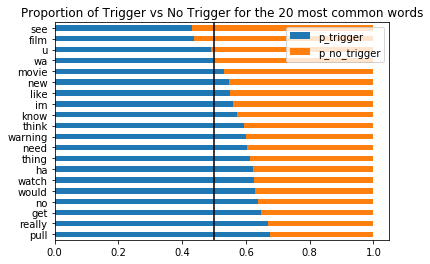

In [41]:
# figure out the percentage of spam vs ham
(word_counts
 .assign(p_trigger=word_counts.trigger / word_counts['all'],
         p_no_trigger=word_counts.no_trigger / word_counts['all'])
 .sort_values(by='all')
 [['p_trigger', 'p_no_trigger']]
 .tail(20)
 .sort_values('p_no_trigger')
 .plot.barh(stacked=True))

plt.vlines(x=0.5, ymin=-1, ymax=20)
plt.title('Proportion of Trigger vs No Trigger for the 20 most common words')

##### Ratio of frequencies for trigger to no trigger.

In [42]:
(word_counts[(word_counts.trigger > 10) & (word_counts.no_trigger > 10)]
 .assign(ratio= lambda df: df.trigger / df.no_trigger)).sort_values(by='ratio').head(10)

,all,trigger,no_trigger,ratio
trailer,44,11,33,0.333333
seeing,38,12,26,0.461538
amazing,40,13,27,0.481481
avenger,57,19,38,0.500000
game,112,45,67,0.671642
loved,27,11,16,0.687500
thought,62,26,36,0.722222
bc,40,17,23,0.739130
hate,35,15,20,0.750000
see,142,61,81,0.753086


##### Word Cloud visualizations.

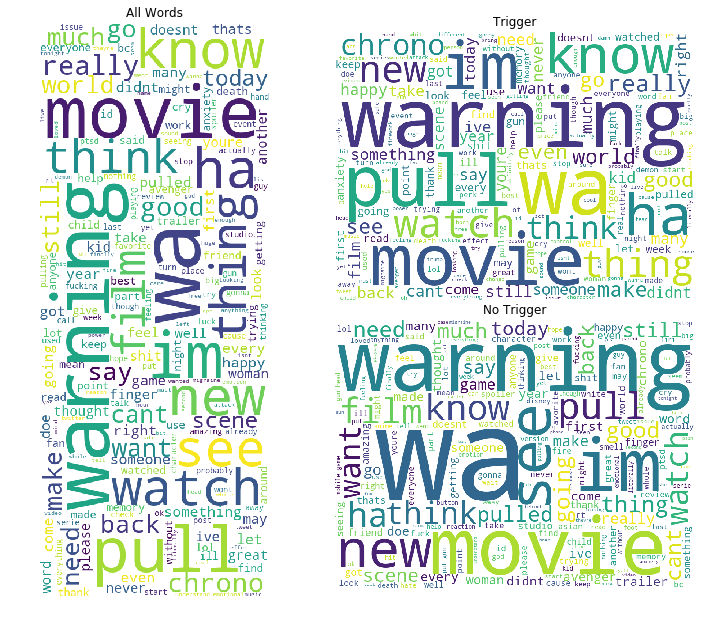

In [43]:
all_cloud = WordCloud(background_color='white', height=1000, width=400).generate(all_words)
trigger_cloud = WordCloud(background_color='white', height=600, width=800).generate(trigger_scene_words)
no_trigger_cloud = WordCloud(background_color='white', height=600, width=800).generate(no_trigger_scene_words)

plt.figure(figsize=(10, 8))
axs = [plt.axes([0, 0, .5, 1]), plt.axes([.5, .5, .5, .5]), plt.axes([.5, 0, .5, .5])]

axs[0].imshow(all_cloud)
axs[1].imshow(trigger_cloud)
axs[2].imshow(no_trigger_cloud)

axs[0].set_title('All Words')
axs[1].set_title('Trigger')
axs[2].set_title('No Trigger')

for ax in axs: ax.axis('off')

#### Exploring bigrams.

Bigrams for Movies with Trigger Scenes.

In [44]:
trigger_bigrams = nltk.ngrams(trigger_scene_words.split(), 2)
trigger_bigrams

<generator object ngrams at 0x0000019FB86654F8>

In [45]:
top_20_trigger_scene_bigrams = pd.Series(list(trigger_bigrams)).value_counts().head(20)
top_20_trigger_scene_bigrams.head()

(feel, like)       14
(need, warning)    14
(im, gonna)        14
(self, harm)       12
(put, warning)     12
dtype: int64

Visualizing Frequencies with a bar plot and a word cloud.

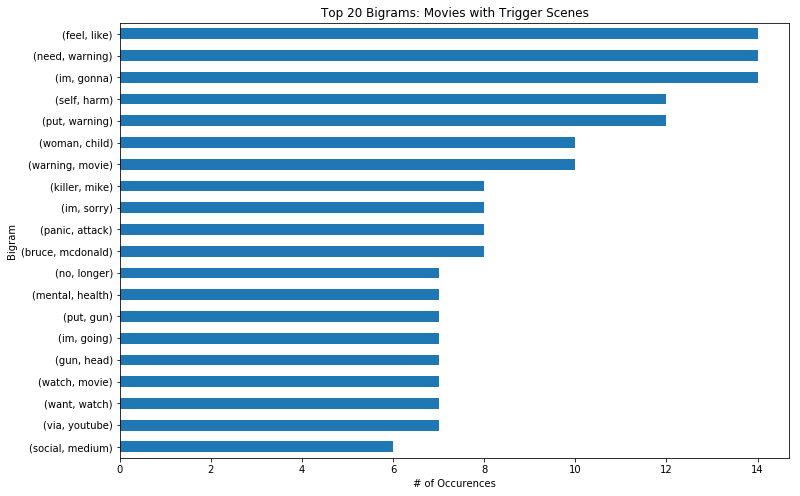

In [46]:
plt.figure(figsize=(12, 8))
top_20_trigger_scene_bigrams.sort_values().plot.barh(stacked=True)

plt.title('Top 20 Bigrams: Movies with Trigger Scenes')
plt.xlabel('# of Occurences')
plt.ylabel('Bigram')
plt.show()

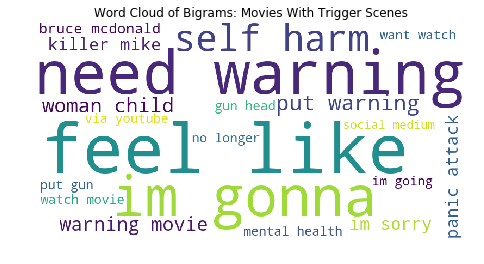

In [47]:
# We can supply our own values to be used to determine how big the words (or
# phrases) should be through the `generate_from_frequencies` method. The
# supplied values must be in the form of a dictionary where the keys are the
# words (phrases), and the values are numbers that correspond to the sizes.
#
# We'll convert our series to a dictionary, and convert the tuples that make up
# the index into a single string that holds each phrase.


data = {k[0] + ' ' + k[1]: v for k, v in top_20_trigger_scene_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.title('Word Cloud of Bigrams: Movies With Trigger Scenes')
plt.imshow(img)
plt.axis('off')
plt.show()

Bigrams for Movies Without Trigger Scenes

In [48]:
no_trigger_bigrams = nltk.ngrams(no_trigger_scene_words.split(), 2)
no_trigger_bigrams

<generator object ngrams at 0x0000019FB8B13570>

In [49]:
top_20_no_trigger_scene_bigrams = pd.Series(list(no_trigger_bigrams)).value_counts().head(20)
top_20_no_trigger_scene_bigrams.head()

(gun, head)       16
(smell, like)     15
(mobile, game)    15
(put, gun)        14
(head, pulled)    11
dtype: int64

Visualizing Frequencies with a bar plot and a word cloud.

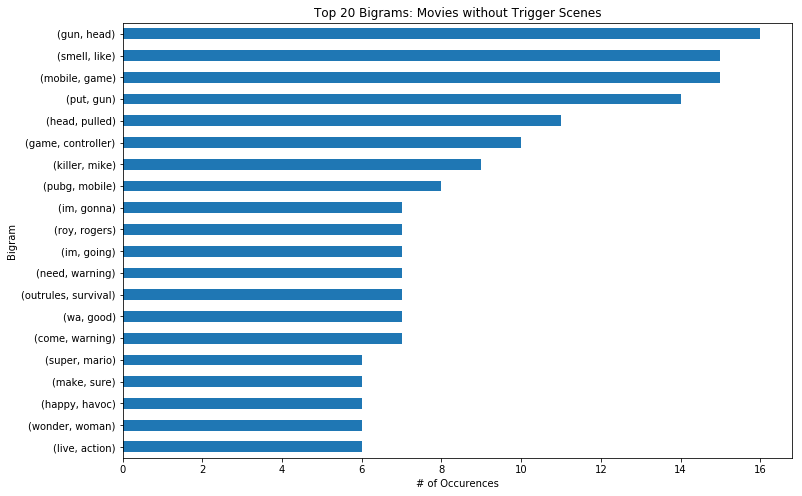

In [50]:
plt.figure(figsize=(12, 8))
top_20_no_trigger_scene_bigrams.sort_values().plot.barh(stacked=True)

plt.title('Top 20 Bigrams: Movies without Trigger Scenes')
plt.xlabel('# of Occurences')
plt.ylabel('Bigram')
plt.show()

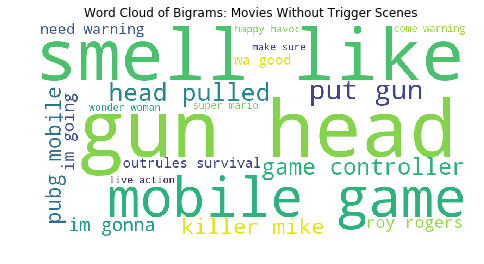

In [51]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_no_trigger_scene_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.title('Word Cloud of Bigrams: Movies Without Trigger Scenes')
plt.axis('off')
plt.show()

### Modeling
First, we need to do some feature engineering.

##### Looking at raw counts, frequencies, and augmented frequencies. Term Frequency.

In [52]:
(pd.DataFrame({'raw_count':trigger_scene_freq})
 .assign(frequency= lambda df: df.raw_count / df.raw_count.sum())
 .assign(augmented_frequency= lambda df: df.frequency / df.frequency.max()).head(10))

,raw_count,frequency,augmented_frequency
warning,255,0.010152,1.000000
wa,206,0.008201,0.807843
like,199,0.007922,0.780392
im,171,0.006808,0.670588
movie,170,0.006768,0.666667
pull,162,0.006449,0.635294
get,115,0.004578,0.450980
ha,106,0.004220,0.415686
no,102,0.004061,0.400000
know,96,0.003822,0.376471


In [53]:
(pd.DataFrame({'raw_count':no_trigger_scene_freq})
 .assign(frequency= lambda df: df.raw_count / df.raw_count.sum())
 .assign(augmented_frequency= lambda df: df.frequency / df.frequency.max()).head(10)).head(10)

,raw_count,frequency,augmented_frequency
wa,209,0.012009,1.000000
warning,169,0.009710,0.808612
like,163,0.009366,0.779904
movie,150,0.008619,0.717703
im,135,0.007757,0.645933
see,81,0.004654,0.387560
u,79,0.004539,0.377990
pull,78,0.004482,0.373206
know,72,0.004137,0.344498
film,68,0.003907,0.325359


##### Inverse Document Frequency

In [54]:
# A simple way to calculate idf for demonstration. Note that this
# function relies on the globally defined documents variable.
def idf(word):
    n_occurences = sum([1 for tweet in df.lemmatized_no_stopwords if word in tweet])
    return df.shape[0] / n_occurences

# Get a list of the unique words
unique_words = pd.Series(' '.join(df.lemmatized_no_stopwords).split()).unique()

# put the unique words into a data frame
(pd.DataFrame(dict(word=unique_words))
 # calculate the idf for each word
 .assign(idf=lambda df: df.word.apply(idf))
 # sort the data for presentation purposes
 .set_index('word')
 .sort_values(by='idf', ascending=False)
 .head(5))

,idf
word,
vibrato2,3397.0
waifu,3397.0
hosted,3397.0
wud,3397.0
bushman,3397.0


##### Using scikit learn to calculate TF-IDF.
Lemmatized without stopwords.

In [55]:
tfidf = TfidfVectorizer()
tfidfs = tfidf.fit_transform(df.lemmatized_no_stopwords)
tfidfs

<3397x11915 sparse matrix of type '<class 'numpy.float64'>'
	with 40240 stored elements in Compressed Sparse Row format>

In [56]:
pd.DataFrame(tfidfs.todense(), columns=tfidf.get_feature_names()).head(10)

,002,007,02,0298,03,0539,06,08,0806,08230,...,zoals,zod,zombie,zone,zoning,zonnebril,zootopia,zorx,zu,zune
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Now we can start modeling
We will be using classification models such as Logistic Regression and Decision Tree.

In [61]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df.lemmatized_no_stopwords)
y = df.trigger_scene

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.3)

train = pd.DataFrame(dict(actual=y_train))
test = pd.DataFrame(dict(actual=y_test))

### Logistic Regression

In [62]:
lr = LogisticRegression().fit(X_train, y_train)

train['predicted'] = lr.predict(X_train)
test['predicted'] = lr.predict(X_test)

C:\Users\mz211\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [63]:
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.predicted, train.actual))
print('---')
print(classification_report(train.actual, train.predicted))

Accuracy: 82.29%
---
Confusion Matrix
actual     False  True 
predicted              
False        512      8
True         413   1444
---
              precision    recall  f1-score   support

       False       0.98      0.55      0.71       925
        True       0.78      0.99      0.87      1452

   micro avg       0.82      0.82      0.82      2377
   macro avg       0.88      0.77      0.79      2377
weighted avg       0.86      0.82      0.81      2377

